In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import xarray as xr
import dask
import sa_utils as sau
import plotting_utils as pu

from utils import roar_code_path as project_code_path
from utils import roar_data_path as project_data_path
from utils import gev_metric_ids, gard_gcms

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# For summary stats
encoding={'quantile': {'dtype': 'U6'}, 'ensemble': {'dtype': 'U9'}, 'ssp': {'dtype': 'U6'}}

In [3]:
# Set fonts
from matplotlib import font_manager
font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

## Analysis

### Non-stationary

In [8]:
####################################################
# Non-stationary bootstrap, absolute projections
####################################################
grid = "LOCA2"
regrid_method = "nearest"
proj_slice = "1950-2100"
hist_slice = None
return_levels = [10,25,50,100]
fit_method = "mle"
stationary = False
stat_name = "nonstat"

_preprocess_func = lambda x: x.sel(time=2075)
time_name = '2075'

# Loop through metrics
for metric_id in gev_metric_ids:
    # Loop through return levels
    for return_level in return_levels:
        ############ Check if done: UC
        col_name = f"{return_level}yr_return_level"
        save_path = f"{project_data_path}/results/{metric_id}_{proj_slice}_{col_name}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            uc = sau.uc_all(metric_id=metric_id,
                            grid=grid,
                            fit_method=fit_method,
                            stationary=stationary,
                            stat_name=stat_name,
                            regrid_method=regrid_method,
                            proj_slice=proj_slice,
                            hist_slice=hist_slice,
                            col_name_main=col_name,
                            col_name_boot=col_name,
                            include_fit_uc=True,
                            _preprocess_func_boot=_preprocess_func,
                            _preprocess_func_main=_preprocess_func,
                           )
            # Store
            uc.to_netcdf(save_path)
            print(f"Done: {save_path.split('/')[-1]}")
            del uc # memory management
        else:
            print(f"UC already done: {save_path.split('/')[-1]}")
        ########### Check if done: summary stats
        col_name = f"{return_level}yr_return_level"
        save_path = f"{project_data_path}/results/summary_{metric_id}_{proj_slice}_{col_name}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            out = sau.summary_stats_main(metric_id=metric_id,
                                        grid=grid,
                                        fit_method=fit_method,
                                        stationary=stationary,
                                        stat_name=stat_name,
                                        regrid_method=regrid_method,
                                        proj_slice=proj_slice,
                                        hist_slice=hist_slice,
                                        col_name=col_name,
                                        _preprocess_func=_preprocess_func)
            # Store
            out.to_netcdf(save_path, encoding=encoding)
            print(f"Done: {save_path.split('/')[-1]}")
            del out # memory management
        else:
            print(f"Summaries already done: {save_path.split('/')[-1]}")

UC already done: max_tasmax_1950-2100_10yr_return_level_2075_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_10yr_return_level_2075_mle_nonstat_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_25yr_return_level_2075_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_25yr_return_level_2075_mle_nonstat_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_50yr_return_level_2075_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_50yr_return_level_2075_mle_nonstat_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_100yr_return_level_2075_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_100yr_return_level_2075_mle_nonstat_LOCA2grid_nearest.nc
UC already done: min_tasmin_1950-2100_10yr_return_level_2075_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_min_tasmin_1950-2100_10yr_return_level_2075_mle_nonstat_LOCA

In [9]:
###################################################
# Non-stationary bootstrap, change from hist, abs
###################################################
grid = "LOCA2"
regrid_method = "nearest"
proj_slice = "1950-2100"
hist_slice = None
return_levels = [10,25,50,100]
fit_method = "mle"
stationary = False
stat_name = "nonstat"

_preprocess_func_main = lambda x: x.sel(time=2075) - x.sel(time=1975)
time_name = '2075-1975'
_preprocess_func_boot = lambda x: x.sel(time_diff = time_name)

# Loop through metrics
for metric_id in gev_metric_ids:
    # Loop through return levels
    for return_level in return_levels:
        ############ Check if done: UC
        col_name_main = f"{return_level}yr_return_level"
        col_name_boot = f"{return_level}yr_return_level_diff"
        save_path = f"{project_data_path}/results/{metric_id}_{proj_slice}_{col_name_boot}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            uc = sau.uc_all(metric_id=metric_id,
                            grid=grid,
                            fit_method=fit_method,
                            stationary=stationary,
                            stat_name=stat_name,
                            regrid_method=regrid_method,
                            proj_slice=proj_slice,
                            hist_slice=hist_slice,
                            col_name_main=col_name_main,
                            col_name_boot=col_name_boot,
                            include_fit_uc=True,
                            _preprocess_func_boot=_preprocess_func_boot,
                            _preprocess_func_main=_preprocess_func_main,
                           )
            # Store
            uc.to_netcdf(save_path)
            print(f"Done: {save_path.split('/')[-1]}")
            del uc # memory management
        else:
            print(f"UC already done: {save_path.split('/')[-1]}")
        ########### Check if done: summary stats
        col_name = f"{return_level}yr_return_level"
        save_path = f"{project_data_path}/results/summary_{metric_id}_{proj_slice}_{col_name_boot}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            out = sau.summary_stats_main(metric_id=metric_id,
                                        grid=grid,
                                        fit_method=fit_method,
                                        stationary=stationary,
                                        stat_name=stat_name,
                                        regrid_method=regrid_method,
                                        proj_slice=proj_slice,
                                        hist_slice=hist_slice,
                                        col_name=col_name,
                                        _preprocess_func=_preprocess_func_main)
            # Store
            out.to_netcdf(save_path, encoding=encoding)
            print(f"Done: {save_path.split('/')[-1]}")
            del out # memory management
        else:
            print(f"Summaries already done: {save_path.split('/')[-1]}")

UC already done: max_tasmax_1950-2100_10yr_return_level_diff_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_10yr_return_level_diff_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_25yr_return_level_diff_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_25yr_return_level_diff_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_50yr_return_level_diff_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_50yr_return_level_diff_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_100yr_return_level_diff_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_100yr_return_level_diff_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
UC already done: min_tasmin_1950-2100_10yr_return_level_diff_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Su

In [10]:
###############################################################
# Non-stationary bootstrap, change from hist, change factor
###############################################################
grid = "LOCA2"
regrid_method = "nearest"
proj_slice = "1950-2100"
hist_slice = None
return_levels = [10,25,50,100]
fit_method = "mle"
stationary = False
stat_name = "nonstat"

_preprocess_func_main = lambda x: x.sel(time=2075) / x.sel(time=1975)
time_name = '2075-1975'
_preprocess_func_boot = lambda x: x.sel(time_diff = time_name)

# Loop through metrics
for metric_id in gev_metric_ids:
    # Loop through return levels
    for return_level in return_levels:
        ############# Check if done: UC
        col_name_main = f"{return_level}yr_return_level"
        col_name_boot = f"{return_level}yr_return_level_chfc"
        save_path = f"{project_data_path}/results/{metric_id}_{proj_slice}_{col_name_boot}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            uc = sau.uc_all(metric_id=metric_id,
                            grid=grid,
                            fit_method=fit_method,
                            stationary=stationary,
                            stat_name=stat_name,
                            regrid_method=regrid_method,
                            proj_slice=proj_slice,
                            hist_slice=hist_slice,
                            col_name_main=col_name_main,
                            col_name_boot=col_name_boot,
                            include_fit_uc=True,
                            _preprocess_func_boot=_preprocess_func_boot,
                            _preprocess_func_main=_preprocess_func_main,
                           )
            # Store
            uc.to_netcdf(save_path)
            print(f"Done: {save_path.split('/')[-1]}")
            del uc # memory management
        else:
            print(f"UC already done: {save_path.split('/')[-1]}")
        ########### Check if done: summary stats
        col_name = f"{return_level}yr_return_level"
        save_path = f"{project_data_path}/results/summary_{metric_id}_{proj_slice}_{col_name_boot}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            out = sau.summary_stats_main(metric_id=metric_id,
                                        grid=grid,
                                        fit_method=fit_method,
                                        stationary=stationary,
                                        stat_name=stat_name,
                                        regrid_method=regrid_method,
                                        proj_slice=proj_slice,
                                        hist_slice=hist_slice,
                                        col_name=col_name,
                                        _preprocess_func=_preprocess_func_main)
            # Store
            out.to_netcdf(save_path, encoding=encoding)
            print(f"Done: {save_path.split('/')[-1]}")
            del out # memory management
        else:
            print(f"Summaries already done: {save_path.split('/')[-1]}")

UC already done: max_tasmax_1950-2100_10yr_return_level_chfc_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_10yr_return_level_chfc_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_25yr_return_level_chfc_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_25yr_return_level_chfc_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_50yr_return_level_chfc_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_50yr_return_level_chfc_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_100yr_return_level_chfc_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_100yr_return_level_chfc_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
UC already done: min_tasmin_1950-2100_10yr_return_level_chfc_2075-1975_mle_nonstat_LOCA2grid_nearest.nc
Su

In [11]:
##################################################################
# Non-stationary scale bootstrap, absolute projections
##################################################################
grid = "LOCA2"
regrid_method = "nearest"
proj_slice = "1950-2100"
hist_slice = None
return_levels = [10,25,50,100]
fit_method = "mle"
stationary = False
stat_name = "nonstat_scale"

_preprocess_func = lambda x: x.sel(time=2075)
time_name = '2075'

# Loop through metrics
for metric_id in gev_metric_ids:
    # Loop through return levels
    for return_level in return_levels:
        ############ Check if done: UC
        col_name = f"{return_level}yr_return_level"
        save_path = f"{project_data_path}/results/{metric_id}_{proj_slice}_{col_name}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            uc = sau.uc_all(metric_id=metric_id,
                            grid=grid,
                            fit_method=fit_method,
                            stationary=stationary,
                            stat_name=stat_name,
                            regrid_method=regrid_method,
                            proj_slice=proj_slice,
                            hist_slice=hist_slice,
                            col_name_main=col_name,
                            col_name_boot=col_name,
                            include_fit_uc=True,
                            _preprocess_func_boot=_preprocess_func,
                            _preprocess_func_main=_preprocess_func,
                           )
            # Store
            uc.to_netcdf(save_path)
            print(f"Done: {save_path.split('/')[-1]}")
            del uc # memory management
        else:
            print(f"UC already done: {save_path.split('/')[-1]}")
        ########### Check if done: summary stats
        col_name = f"{return_level}yr_return_level"
        save_path = f"{project_data_path}/results/summary_{metric_id}_{proj_slice}_{col_name}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            out = sau.summary_stats_main(metric_id=metric_id,
                                        grid=grid,
                                        fit_method=fit_method,
                                        stationary=stationary,
                                        stat_name=stat_name,
                                        regrid_method=regrid_method,
                                        proj_slice=proj_slice,
                                        hist_slice=hist_slice,
                                        col_name=col_name,
                                        _preprocess_func=_preprocess_func)
            # Store
            out.to_netcdf(save_path, encoding=encoding)
            print(f"Done: {save_path.split('/')[-1]}")
            del out # memory management
        else:
            print(f"Summaries already done: {save_path.split('/')[-1]}")

UC already done: max_tasmax_1950-2100_10yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_10yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_25yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_25yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_50yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_50yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_100yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_100yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: min_tasmin_1950-2100_10yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_min_ta

/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/.venv/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/.venv/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/.venv/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


Done: summary_max_pr_1950-2100_100yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_cdd_1950-2100_10yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_cdd_1950-2100_10yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_cdd_1950-2100_25yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_cdd_1950-2100_25yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_cdd_1950-2100_50yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_cdd_1950-2100_50yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_cdd_1950-2100_100yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_cdd_1950-2100_100yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_hdd_1950-2100_10yr_return_level_2075_mle_nonsta

In [12]:
##################################################################
# Non-stationary scale bootstrap, change from hist, abs
##################################################################
grid = "LOCA2"
regrid_method = "nearest"
proj_slice = "1950-2100"
hist_slice = None
return_levels = [10,25,50,100]
fit_method = "mle"
stationary = False
stat_name = "nonstat_scale"

_preprocess_func_main = lambda x: x.sel(time=2075) - x.sel(time=1975)
time_name = '2075-1975'
_preprocess_func_boot = lambda x: x.sel(time_diff = time_name)

# Loop through metrics
for metric_id in gev_metric_ids:
    # Loop through return levels
    for return_level in return_levels:
        ############ Check if done: UC
        col_name_main = f"{return_level}yr_return_level"
        col_name_boot = f"{return_level}yr_return_level_diff"
        save_path = f"{project_data_path}/results/{metric_id}_{proj_slice}_{col_name_boot}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            uc = sau.uc_all(metric_id=metric_id,
                            grid=grid,
                            fit_method=fit_method,
                            stationary=stationary,
                            stat_name=stat_name,
                            regrid_method=regrid_method,
                            proj_slice=proj_slice,
                            hist_slice=hist_slice,
                            col_name_main=col_name_main,
                            col_name_boot=col_name_boot,
                            include_fit_uc=True,
                            _preprocess_func_boot=_preprocess_func_boot,
                            _preprocess_func_main=_preprocess_func_main,
                           )
            # Store
            uc.to_netcdf(save_path)
            print(f"Done: {save_path.split('/')[-1]}")
            del uc # memory management
        else:
            print(f"UC already done: {save_path.split('/')[-1]}")
        ########### Check if done: summary stats
        col_name = f"{return_level}yr_return_level"
        save_path = f"{project_data_path}/results/summary_{metric_id}_{proj_slice}_{col_name_boot}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            out = sau.summary_stats_main(metric_id=metric_id,
                                        grid=grid,
                                        fit_method=fit_method,
                                        stationary=stationary,
                                        stat_name=stat_name,
                                        regrid_method=regrid_method,
                                        proj_slice=proj_slice,
                                        hist_slice=hist_slice,
                                        col_name=col_name,
                                        _preprocess_func=_preprocess_func_main)
            # Store
            out.to_netcdf(save_path, encoding=encoding)
            print(f"Done: {save_path.split('/')[-1]}")
            del out # memory management
        else:
            print(f"Summaries already done: {save_path.split('/')[-1]}")

UC already done: max_tasmax_1950-2100_10yr_return_level_diff_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_10yr_return_level_diff_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_25yr_return_level_diff_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_25yr_return_level_diff_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_50yr_return_level_diff_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_50yr_return_level_diff_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_100yr_return_level_diff_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_100yr_return_level_diff_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: min_tasmin_1950-2100_10yr_return_level_di

In [13]:
##################################################################
# Non-stationary scale bootstrap, change from hist, change factor
##################################################################
grid = "LOCA2"
regrid_method = "nearest"
proj_slice = "1950-2100"
hist_slice = None
return_levels = [10,25,50,100]
fit_method = "mle"
stationary = False
stat_name = "nonstat_scale"

_preprocess_func_main = lambda x: x.sel(time=2075) / x.sel(time=1975)
time_name = '2075-1975'
_preprocess_func_boot = lambda x: x.sel(time_diff = time_name)

# Loop through metrics
for metric_id in gev_metric_ids:
    # Loop through return levels
    for return_level in return_levels:
        ########## Check if done: UC
        col_name_main = f"{return_level}yr_return_level"
        col_name_boot = f"{return_level}yr_return_level_chfc"
        save_path = f"{project_data_path}/results/{metric_id}_{proj_slice}_{col_name_boot}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            uc = sau.uc_all(metric_id=metric_id,
                            grid=grid,
                            fit_method=fit_method,
                            stationary=stationary,
                            stat_name=stat_name,
                            regrid_method=regrid_method,
                            proj_slice=proj_slice,
                            hist_slice=hist_slice,
                            col_name_main=col_name_main,
                            col_name_boot=col_name_boot,
                            include_fit_uc=True,
                            _preprocess_func_boot=_preprocess_func_boot,
                            _preprocess_func_main=_preprocess_func_main,
                           )
            # Store
            uc.to_netcdf(save_path)
            print(f"Done: {save_path.split('/')[-1]}")
            del uc # memory management
        else:
            print(f"UC already done: {save_path.split('/')[-1]}")
        ########### Check if done: summary stats
        col_name = f"{return_level}yr_return_level"
        save_path = f"{project_data_path}/results/summary_{metric_id}_{proj_slice}_{col_name_boot}_{time_name}_{fit_method}_{stat_name}_{grid}grid_{regrid_method}.nc"
        # Calculate
        if not os.path.exists(save_path):
            out = sau.summary_stats_main(metric_id=metric_id,
                                        grid=grid,
                                        fit_method=fit_method,
                                        stationary=stationary,
                                        stat_name=stat_name,
                                        regrid_method=regrid_method,
                                        proj_slice=proj_slice,
                                        hist_slice=hist_slice,
                                        col_name=col_name,
                                        _preprocess_func=_preprocess_func_main)
            # Store
            out.to_netcdf(save_path, encoding=encoding)
            print(f"Done: {save_path.split('/')[-1]}")
            del out # memory management
        else:
            print(f"Summaries already done: {save_path.split('/')[-1]}")

UC already done: max_tasmax_1950-2100_10yr_return_level_chfc_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_10yr_return_level_chfc_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_25yr_return_level_chfc_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_25yr_return_level_chfc_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_50yr_return_level_chfc_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_50yr_return_level_chfc_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: max_tasmax_1950-2100_100yr_return_level_chfc_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_1950-2100_100yr_return_level_chfc_2075-1975_mle_nonstat_scale_LOCA2grid_nearest.nc
UC already done: min_tasmin_1950-2100_10yr_return_level_ch

### Stationary

In [10]:
# Stationary bootstrap
grid = "LOCA2"
regrid_method = "nearest"
proj_slice = "2050-2100"
return_levels = [10,25,50,100]
fit_method = "lmom"
stationary = True
stat_str = "stat"
filter_vals = None
filter_str = ""

preprocess_funcs = {
    'diff': lambda x: x.sel(time='diff'), # diff
    'chfc': lambda x: x.sel(time='chfc'), # change factor
    'proj': lambda x: x.sel(time='proj'), # absolute projection
}

# Loop through metrics
for metric_id in gev_metric_ids:
    # Do for projection, change
    for preprocess_func_name in list(preprocess_funcs.keys()):
        _preprocess_func = preprocess_funcs[preprocess_func_name]
        if preprocess_func_name == 'proj':
            hist_slice = None
        else:
            hist_slice = "1950-2014"
        # Loop through return levels
        for return_level in return_levels:
            # Check if done
            col_name = f"{return_level}yr_return_level"
            save_path = f"{project_data_path}/results/{metric_id}_{proj_slice}_{hist_slice}_{col_name}_{preprocess_func_name}_{fit_method}_{stat_str}_{grid}grid_{regrid_method}{filter_str}.nc"
            # Calculate
            if not os.path.exists(save_path):
                try:
                    uc = sau.uc_all(metric_id=metric_id,
                                    grid=grid,
                                    fit_method=fit_method,
                                    stationary=stationary,
                                    regrid_method=regrid_method,
                                    proj_slice=proj_slice,
                                    stat_name=stat_str,
                                    hist_slice=hist_slice,
                                    col_name_main=col_name,
                                    col_name_boot=col_name,
                                   _preprocess_func_boot=_preprocess_func)
                    # Store
                    uc.to_netcdf(save_path)
                    print(f"Done: {save_path.split('/')[-1]}")
                    del uc # memory management
                except Exception as e: 
                    print(f"Error with {save_path}: {e}")
            else:
                print(f"UC already done: {save_path.split('/')[-1]}")
            ########### Check if done: summary stats
            col_name = f"{return_level}yr_return_level"
            save_path = f"{project_data_path}/results/summary_{metric_id}_{proj_slice}_{hist_slice}_{col_name}_{preprocess_func_name}_{fit_method}_{stat_str}_{grid}grid_{regrid_method}{filter_str}.nc"
            # Calculate
            if not os.path.exists(save_path):
                out = sau.summary_stats_main(metric_id=metric_id,
                                             grid=grid,
                                             fit_method=fit_method,
                                             stationary=stationary,
                                             stat_name=stat_str,
                                             regrid_method=regrid_method,
                                             proj_slice=proj_slice,
                                             hist_slice=hist_slice,
                                             col_name=col_name,
                                             _preprocess_func=_preprocess_func)
                # Store
                out.to_netcdf(save_path, encoding=encoding)
                print(f"Done: {save_path.split('/')[-1]}")
                del out # memory management
            else:
                print(f"Summaries already done: {save_path.split('/')[-1]}")

UC already done: max_tasmax_2050-2100_1950-2014_10yr_return_level_diff_lmom_stat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_2050-2100_1950-2014_10yr_return_level_diff_lmom_stat_LOCA2grid_nearest.nc
UC already done: max_tasmax_2050-2100_1950-2014_25yr_return_level_diff_lmom_stat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_2050-2100_1950-2014_25yr_return_level_diff_lmom_stat_LOCA2grid_nearest.nc
UC already done: max_tasmax_2050-2100_1950-2014_50yr_return_level_diff_lmom_stat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_2050-2100_1950-2014_50yr_return_level_diff_lmom_stat_LOCA2grid_nearest.nc
UC already done: max_tasmax_2050-2100_1950-2014_100yr_return_level_diff_lmom_stat_LOCA2grid_nearest.nc
Summaries already done: summary_max_tasmax_2050-2100_1950-2014_100yr_return_level_diff_lmom_stat_LOCA2grid_nearest.nc
UC already done: max_tasmax_2050-2100_1950-2014_10yr_return_level_chfc_lmom_stat_LOCA2grid_nearest.nc
Summaries already do

## Plots

### Non-maps

In [12]:
rls = [10,25,50,100]
ds_uc = xr.concat([xr.open_dataset(f'{project_data_path}/results/max_tasmax_1950-2100_{rl}yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc')[['uc_99w_main']].assign_coords(rl=rl) for rl in rls],
                 dim='rl')

In [66]:
ds_mean = xr.open_mfdataset('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/results/summary_max_tasmax_1950-2100_*yr_return_level_2075_mle_nonstat_scale_LOCA2grid_nearest.nc')
mask = xr.open_dataset('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/mask.nc')['mask']

In [80]:
ds_mean = xr.open_mfdataset('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/results/summary_max_tasmax_2050-2100_1950-2014_*yr_return_level_diff_lmom_stat_LOCA2grid_nearest.nc')
mask = xr.open_dataset('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/mask.nc')['mask']

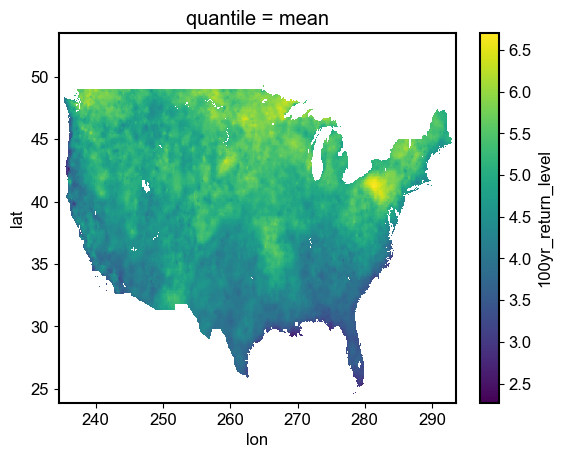

In [83]:
ds_mean.where(mask)['100yr_return_level'].mean(dim=['ensemble', 'ssp']).sel(quantile='mean').plot()

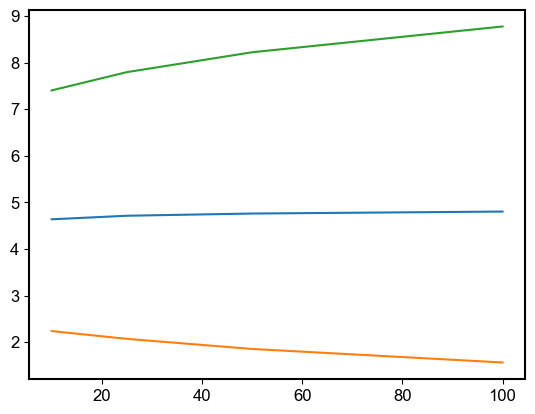

In [82]:
fig, ax = plt.subplots()
data = ds_mean.where(mask).mean(dim=['lat','lon'], skipna=True).mean(dim=['ensemble', 'ssp']).sel(quantile='mean').load()
ax.plot(rls, [data[f"{rl}yr_return_level"] for rl in rls])

data = ds_mean.where(mask).mean(dim=['lat','lon'], skipna=True).mean(dim=['ensemble', 'ssp']).sel(quantile='q01').load()
ax.plot(rls, [data[f"{rl}yr_return_level"] for rl in rls])

data = ds_mean.where(mask).mean(dim=['lat','lon'], skipna=True).mean(dim=['ensemble', 'ssp']).sel(quantile='q99').load()
ax.plot(rls, [data[f"{rl}yr_return_level"] for rl in rls])

plt.show()

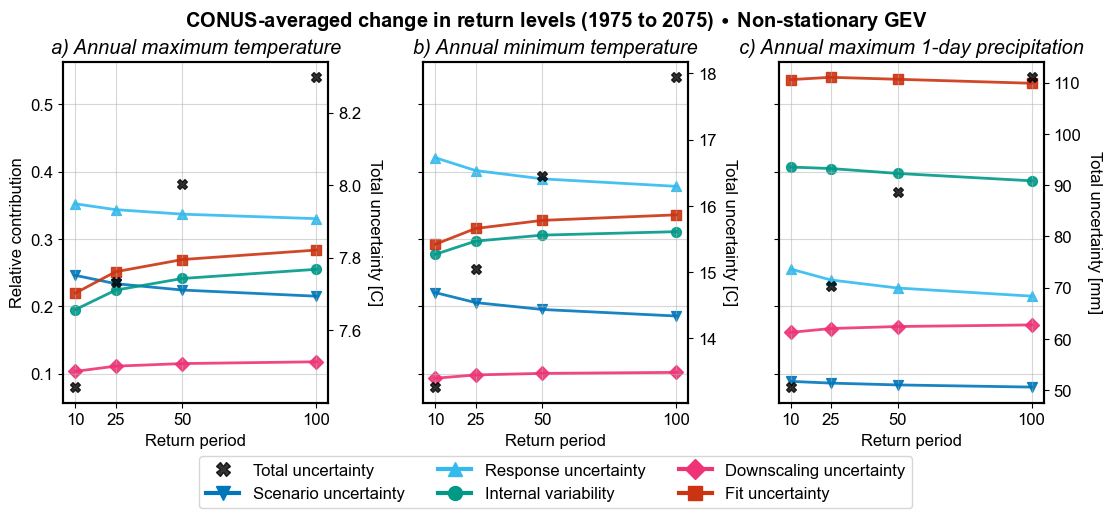

In [10]:
## AGU plot
grid = 'LOCA2'
regrid_method = 'nearest'
return_periods = [10,25,50,100]
total_uc = 'uc_99w_main'
# total_uc = 'uc_range_main'

fig = plt.figure(layout='constrained', figsize=(11, 5))
subfigs = fig.subfigures(2, 1, hspace=0.12, height_ratios=[8,1])

## Non-stationary: change
proj_slice = '1950-2100'
fit_method = 'mle'
stat_str = 'nonstat_scale'

axsBottom = subfigs[0].subplots(1, 3, sharey=True, gridspec_kw={"wspace": 0.1})

legend_elements = pu.plot_uc_rls(
    coord_or_mean="mean",
    proj_slice=proj_slice,
    hist_slice=None,
    fit_method=fit_method,
    stat_str=stat_str,
    grid=grid,
    total_uc=total_uc,
    regrid_method=regrid_method,
    title = "CONUS-averaged change in return levels (1975 to 2075)" + r" $\bullet$ " + "Non-stationary GEV",
    fig = subfigs[0], 
    axs = axsBottom,
    store_path = None,
    legend=False,
    idm_start=0,
    return_legend=True,
    y_title = 1.06,
    time_str = 'diff_2075-1975',
    plot_fit_uc = True
)

# Add legend
subfigs[1].legend(handles=legend_elements,
                  bbox_to_anchor=[0.5, 1.0],
                  loc='center',
                  fontsize=12,
                  ncol=3)

plt.savefig('../figs/AGU.pdf', bbox_inches='tight')

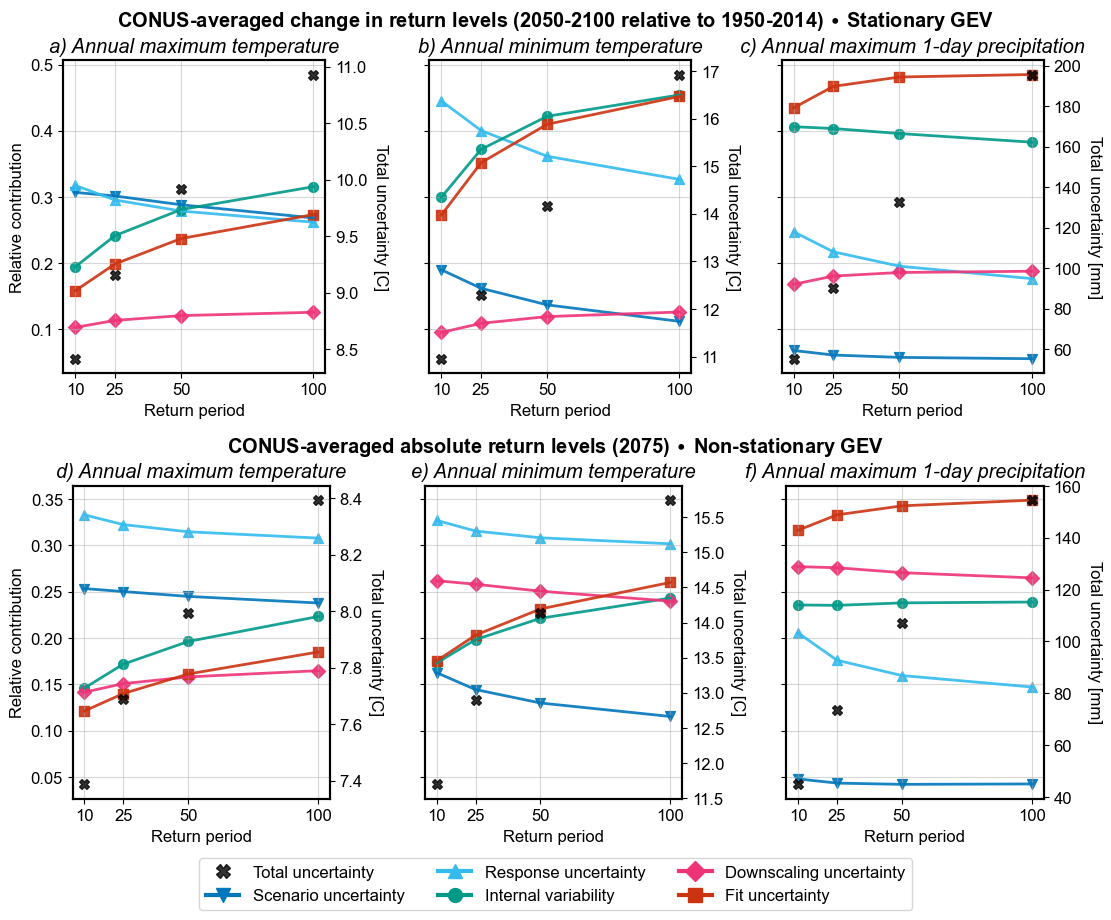

In [9]:
## Main: figure 5
grid = 'LOCA2'
regrid_method = 'nearest'
return_periods = [10,25,50,100]
total_uc = 'uc_99w_main'
# total_uc = 'uc_range_main'

## Stationary: change
proj_slice = '2050-2100'
fit_method = 'lmom'
stat_str = 'stat'

fig = plt.figure(layout='constrained', figsize=(11, 9))
subfigs = fig.subfigures(3, 1, hspace=0.12, height_ratios=[8,8,1])

# Top tow: change from historical
hist_slice = '1950-2014'
axsTop = subfigs[0].subplots(1, 3, sharey=True, gridspec_kw={"wspace": 0.1})

pu.plot_uc_rls(
    coord_or_mean="mean",
    proj_slice=proj_slice,
    hist_slice=hist_slice,
    fit_method=fit_method,
    stat_str=stat_str,
    grid=grid,
    total_uc=total_uc,
    regrid_method=regrid_method,
    title = "CONUS-averaged change in return levels (2050-2100 relative to 1950-2014)" + r" $\bullet$ " + "Stationary GEV",
    fig = subfigs[0], 
    axs = axsTop,
    store_path = None,
    legend = False,
    y_title = 1.06,
    time_str = 'diff',
)

## Non-stationary: absolute
proj_slice = '1950-2100'
fit_method = 'mle'
stat_str = 'nonstat'

axsBottom = subfigs[1].subplots(1, 3, sharey=True, gridspec_kw={"wspace": 0.1})

legend_elements = pu.plot_uc_rls(
    coord_or_mean="mean",
    proj_slice=proj_slice,
    hist_slice=hist_slice,
    fit_method=fit_method,
    stat_str=stat_str,
    grid=grid,
    total_uc=total_uc,
    regrid_method=regrid_method,
    title = "CONUS-averaged absolute return levels (2075)" + r" $\bullet$ " + "Non-stationary GEV",
    fig = subfigs[1], 
    axs = axsBottom,
    store_path = None,
    legend=False,
    idm_start=3,
    return_legend=True,
    y_title = 1.06,
    time_str = '2075',
    plot_fit_uc = True
)

# Add legend
subfigs[2].legend(handles=legend_elements,
                  bbox_to_anchor=[0.5, 1.0],
                  loc='center',
                  fontsize=12,
                  ncol=3)

plt.savefig('../figs/main/final/figure5.pdf', bbox_inches='tight')